In [3]:

from music21 import *
from IPython.display import Image

def music(info: list, notes: str):
    s = stream.Score()
    part = stream.Part()
    if info[0] == "Treble":
        part.append(clef.TrebleClef())
    elif info[0] == "Bass":
        part.append(clef.BassClef)
    elif info[0] == "None":
        part.append(clef.NoClef())
    part.append(key.KeySignature(info[1]))
    part.append(meter.TimeSignature(info[2]))
    
    split_notes = notes.split(" ")
    for n in split_notes:
        if n[0] == "!":
            part.append(harmony.ChordSymbol(n[1:]))
        elif n == "^":
            part.append(layout.SystemLayout(isNew=True))
        else:
            is_chord = False
            is_tie = "none"
            note_and_length = n.split("/")
            if "(" in note_and_length[0]:
                is_chord = True
                chord_name = (
                    note_and_length[0].replace("(", "").replace(")", "").split("$")
                )
            else:
                note_name = note_and_length[0]
            if "{" in note_and_length[1]:
                is_tie = "start"
                note_and_length[1] = note_and_length[1].replace("{", "")
            if "}" in note_and_length[1]:
                is_tie = "stop"
                note_and_length[1] = note_and_length[1].replace("}", "")
            if "*" in note_and_length[1]:
                length_and_col = note_and_length[1].split("*")
                note_length = length_and_col[0]
                note_col = length_and_col[1]
            else:
                note_length = note_and_length[1]
                note_col = ""
            if note_length == "0.3":
                note_length = 0.333333333
            else:
                note_length = float(note_length)
            if is_chord:
                add_n = chord.Chord(chord_name, quarterLength=note_length)
            else:
                if note_name.lower() == "r":
                    add_n = note.Rest(quarterLength=note_length)
                else:
                    add_n = note.Note(note_name, quarterLength=note_length)
            if is_tie != "none":
                add_n.tie = tie.Tie(is_tie)
            if note_col != "":
                add_n.style.color = note_col
            part.append(add_n)
    
    s.append(part)
    return Image(filename=s.write("musicxml.png"))

# The Guitarist's Guide to Composing and Improvising

by **Jon Damian**

## Foreword

In 1975, I had the good fortune to meet Jon Damian. He is one of the few musicians I know who has found his own unique voice and the courage to stay true to it. He has a deep understanding of the history, and, at the same time, is always looking ahead using his fantastic imagination. As my teacher, Jon gave me the confidence to go after my own ideas, and he showed me new ways to look at music. He continues to be an inspiration and example. Now with his new book, *The Guitarist's Guide to Composing and Improvising*, everyone will have a chance to learn about some of the fantastic things in Jon Damian's world.

Music, for me, has always been a place where anything is possible - a refuge, a magical world where anyone can go, all kinds of people can come together, and anything can happen. We are limited only by our imaginations. I believe that what we do and learn inside the world of music can affect what goes on in the world outside in a big, positive way. Music is so important - like food and water. There are so many possibilities, and many doors yet to be opened.

In this book, Jon gives us the keys to open many musical doors. Many of these doors we probably didn't even know were there. The publication of *The Guitarist's Guide to Composing and Improvising* is an important musical event - not just for guitarists, but for all musicians.

There's so much amazing stuff in here.

Bill Frisell

## Acknowledgements

Thanks to my wife, Betsy, for her never-ending love and support, to my children, Benjamin and Eugene, for their wonderful ideas, to my mom, Rosie, for her incredible whistling, to my father, Sal, for his artistic support, to my sister, Judy, for her inspiring record collection, to my brother, Butch, for stopping his trumpet lessons, and to bassist, barrister, and consultant, John Voigt, for his friendship and advice.

To all my fellow players for their inspiration, especially my faithful trio members Bob Nieske and Ralph Rosen, to Jim Guttmann for his "fascinatin' rhythm," and to Joel Press and the Press Institute players. To all my colleagues at the Berklee College of Music, to Matt Marvuglio, Larry Baione, and Rick Peckham for their leadership, and to Larry Monroe, Greg Badolato, to Peter Kontrimas and Bob Kroeger for their engineering, and to Berklee Press.

To all my teachers: Al Natale, Bobby "Eyes," Bill Elgart, D. Sharpe, Frank Turziano, Jeronimas Kascinskas, Mr. Barnes, Herb Pomeroy, Gary Burton, Bill Leavitt, to all of the Creative Workshops, and to all the teachers I haven't met yet.

To Jim Hall, Wes, Grant, Kenny, and Django, for their inspiration, to Bill Frisell for his wonderful foreword, Jane Goldman for her insightful quote, to Creative Workshop members Sebastien, Danielle, Apostolos and Henrik for their wonderful playing on *Coronation* and "Mardi Gras," to Tyler for his courage and inspiration, to Ken Barney for Ink Blot research, Peter Boolos for Ivan Pavlov research, Ted Osborne for computer research, Susan Barney for her binding support, and Julie Snow and Bati for their feedback.

And to all of my friends and students, including you, who put up with me.

## Introduction

I still remember holding my first guitar, a big old sunburst, acoustic, F hole, Harmony arch top—a $25 chunk of beauty. I remember the excitement of picking out my first chord, and finding where the black dots on those chord diagrams were on the fingerboard. My first major-seventh chord was pure ecstasy. I was like a child turning over rocks to find strange creatures lurking underneath. 

I am sure that many of you share this curiosity and excitement. From Bach (yes, Bach played the guitar too!) to Zappa, guitarists have always had one thing in common: curiosity. The guitar provokes curiosity. Just look at it. The guitar can take on very curious shapes and sounds. Just think of what Bach’s guitar looked and sounded like, and then think of Zappa’s.

Our primary interest may be classical, blues, rock, or jazz. But there is a common bond in all of these musics. They originated as improvisatory ideas. Some curious musician banged around on an instrument (improvised), found an idea he liked, maybe wrote it down (composed), and then shared it with others. Gradually, a musical style was born. The most exciting part of playing any music is during these periods of improvisation (at least, in my experience).

What is improvisation? This works for me: “Improvisation consists of the ability to be aware of a moment (in this case, a musical one) and react to it in an efficient manner.” This actually holds true for the art of composition, as well, since composition is an extended improvisation. Since it is tough for me to separate the two, I use the word “comprovisation.”



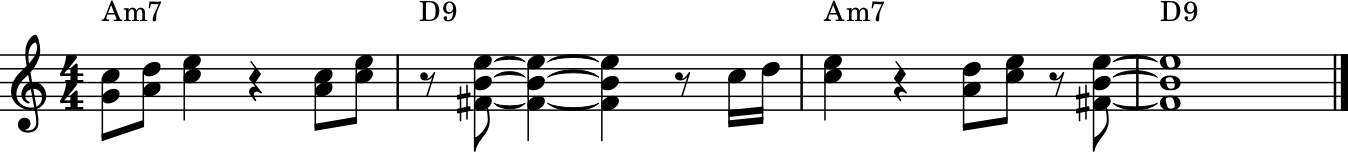

In [8]:
info = ["Treble", 0, "4/4"]
notes = "!am7 (g4$c5)/0.5 (a4$d5)/0.5 (c5$e5)/1 r/1 (a4$c5)/0.5 (c5$e5)/0.5 !d9 r/0.5 (f#4$b4$e5)/0.5{ (f#4$b4$e5)/1{ (f#4$b4$e5)/1} r/0.5 c5/0.25 d5/0.25 !am7 (c5$e5)/1 r/1 (a4$d5)/0.5 (c5$e5)/0.5 r/0.5 (f#4$b4$e5)/0.5{ !d9 (f#4$b4$e5)/4}"
music(info, notes)